# 資料分析

In [1]:
#粗略查看資料型態
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西
#因方便辨識有重新命名檔案(不然都是u) 所以才會有u.data.data這種鬼東西


import pandas as pd
import numpy as np

#u.data 評分資料
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("u.data.data", sep = '\t', header = None, names=rating_header)
print(rating.head())
print('\n')
rating.info()
print("__________________________________________________________________________\n")

#u.item 電影資料
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv('u.item.item', sep = '|', header = None, encoding = 'latin1', names = movie_header)
print(movies.head())
print('\n')
movies.info()
print("__________________________________________________________________________\n")

#u.user 使用者資料
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
user = pd.read_csv('u.user.user', sep = '|', header = None, encoding = 'latin1', names = user_header)
print(user.head())
print('\n')
user.info()
print("__________________________________________________________________________\n")

#u.genre 電影種類

#u.occupation 職業種類

#u.info 資料集資訊
# 943 users 
# 1682 items 
# 100000 ratings




   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
__________________________________________________________________________

   item_id              title release_date  video_release_date  \
0        1   Toy Story (1995)  01-Jan-1995                 NaN   
1        2   GoldenEye (1995)  01-Jan-1995                 NaN   
2        3  Four Rooms (1995)  01-Jan-1995                 NaN   
3        4  Get Shorty (1995)  01-Jan-1995 

### 有些網址有缺　但不重要

In [2]:
#去除u.item 中 video_release_date 欄位(為NaN)
movies = movies.drop(columns=['video_release_date'])
movies.head()
#movies.info()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
#將性別與職業轉換成數值資料並放在users_num中

#性別
users_num = user.copy()
#映射
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True)

#職業
occupation = pd.read_csv("u.occupation.occupation", header = None)
#有幾種職業
occupation_list = occupation.values
#映射
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)

#轉換後寫進users_num.csv中
users_num.to_csv("users_num.csv", index=False, encoding="utf8")
#後五筆
users_num.tail()



,user_id,age,gender,occupation,zip_code
938,939,26,0,18,33319
939,940,32,1,0,02215
940,941,20,1,18,97229
941,942,48,0,10,78209
942,943,22,1,18,77841


Text(0.5, 1.0, 'Age')

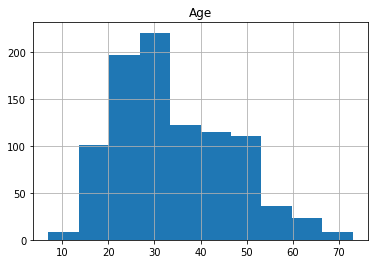

In [4]:
#年齡分布
import matplotlib.pyplot as plt
%matplotlib inline

user.hist('age')
plt.title('Age')
#年輕人較多

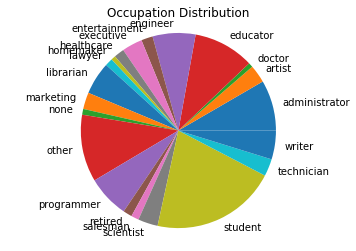

In [5]:
#職業分布
occupation_count = user[["user_id", "occupation"]].groupby("occupation", as_index=False).size()
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("Occupation Distribution")
plt.axis("equal")
plt.show()
#學生占比較大 和年齡分布符合

In [12]:
users_num['gender'] = users_num['gender'].astype(int)

Text(0.5, 1.0, 'Gender')

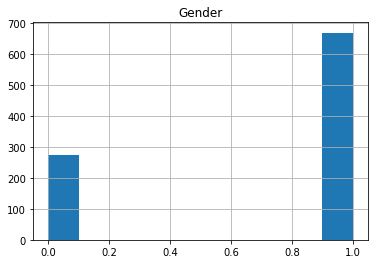

In [13]:
#性別比例
users_num.hist('gender')
plt.title('Gender')

#男性觀眾居多

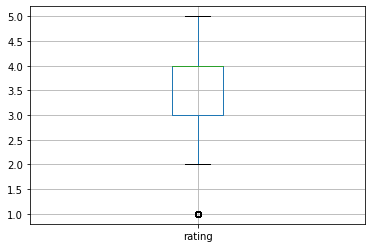

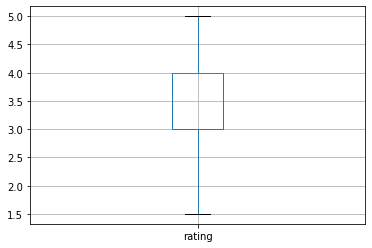

In [37]:
#評分的box_plot
#Clean outlier

df = rating

def box_plot(col_name):
    
    bp = df.boxplot(column=[col_name])
    bp.plot()
    plt.show()

def clean_outlier(col_name):
    q1, q2 , q3 = df[col_name].quantile([0.25, 0.5, 0.75])
    IQR = q3-q1
    lower_cap = q1 - 1.5*IQR
    upper_cap = q3 + 1.5*IQR
    df[col_name] = df[col_name].apply(lambda x: upper_cap if x > upper_cap else (lower_cap if (x<lower_cap) else x))
    
box_plot('rating')

clean_outlier('rating')

box_plot('rating')

#清理完後寫進＂cleaned_rating.csv＂中
df.to_csv("cleaned_rating.csv", index=False, encoding="utf8")

In [2]:
#資料合併
#不確定要不要用清理後的rating 暫用原始rating

all_data = pd.merge(pd.merge(user,rating), movies)
#合併後的前十筆
all_data.head(10)


,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
5,60,50,M,healthcare,06472,61,4,883326652,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
6,76,20,M,student,02215,61,4,875028123,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
7,94,26,M,student,71457,61,5,891720761,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
8,144,53,M,programmer,20910,61,3,888106182,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
9,154,25,M,student,53703,61,4,879138657,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#找出特定ID的評分
all_data[all_data.user_id==13]

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
127,13,47,M,educator,29206,33,5,882397581,Desperado (1995),01-Jan-1995,...,0,0,0,0,0,1,0,1,0,0
224,13,47,M,educator,29206,160,4,882140070,Glengarry Glen Ross (1992),01-Jan-1992,...,0,0,0,0,0,0,0,0,0,0
367,13,47,M,educator,29206,202,5,882141425,Groundhog Day (1993),01-Jan-1993,...,0,0,0,0,0,1,0,0,0,0
710,13,47,M,educator,29206,265,4,882140038,"Hunt for Red October, The (1990)",01-Jan-1990,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89368,13,47,M,educator,29206,793,5,882141841,Crooklyn (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
89378,13,47,M,educator,29206,893,3,882774005,For Richer or Poorer (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
89392,13,47,M,educator,29206,834,1,882397068,Halloween: The Curse of Michael Myers (1995),01-Jan-1995,...,0,0,1,0,0,0,0,1,0,0
89417,13,47,M,educator,29206,822,3,884538634,Faces (1968),01-Jan-1968,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#按性別區分 計算每部電影的男女觀眾評分的平均值與中位數
mean_rating_gender = all_data.pivot_table(values ='rating', index ='title', columns ='gender', aggfunc =[np.mean,np.median])
#印出前10筆
mean_rating_gender.head(10)



mean           median     
gender                                              F         M      F    M
title                                                                      
'Til There Was You (1997)                    2.200000  2.500000    2.0  2.5
1-900 (1994)                                 1.000000  3.000000    1.0  3.5
101 Dalmatians (1996)                        3.116279  2.772727    3.0  3.0
12 Angry Men (1957)                          4.269231  4.363636    4.5  4.0
187 (1997)                                   3.500000  2.870968    3.5  3.0
2 Days in the Valley (1996)                  3.235294  3.223684    3.0  3.0
20,000 Leagues Under the Sea (1954)          3.214286  3.568966    3.0  4.0
2001: A Space Odyssey (1968)                 3.491228  4.103960    4.0  4.0
3 Ninjas: High Noon At Mega Mountain (1998)  1.000000  1.000000    1.0  1.0
39 Steps, The (1935)                         4.000000  4.060000    4.0  4.0

In [29]:
#男女觀眾平均評分前五
mean_rating_gender = all_data.pivot_table(values ='rating', index ='title', columns ='gender', aggfunc = 'mean')
#女生平均前五
mean_rating_gender.sort_values(by='F', ascending = False).head()

gender,F,M
title,,
Prefontaine (1997),5.0,5.000000
Faster Pussycat! Kill! Kill! (1965),5.0,2.666667
Telling Lies in America (1997),5.0,3.083333
Maya Lin: A Strong Clear Vision (1994),5.0,4.333333
Stripes (1981),5.0,3.500000


In [28]:
#男生平均前五
mean_rating_gender.sort_values(by='M', ascending = False).head()

gender,F,M
title,,
"Great Day in Harlem, A (1994)",NaN,5.0
Santa with Muscles (1996),NaN,5.0
Prefontaine (1997),5.0,5.0
Aiqing wansui (1994),NaN,5.0
Entertaining Angels: The Dorothy Day Story (1996),NaN,5.0


In [32]:
#男女品味衝突前十的電影
mean_rating_gender['diff'] = mean_rating_gender.F-mean_rating_gender.M
mean_rating_gender.sort_values(by='diff', ascending = False).head(10)

gender,F,M,diff
title,,,
"Lay of the Land, The (1997)",4.0,1.000000,3.000000
Love and Death on Long Island (1997),4.0,1.000000,3.000000
Rough Magic (1995),4.0,1.000000,3.000000
"Visitors, The (Visiteurs, Les) (1993)",5.0,2.000000,3.000000
Loch Ness (1995),4.0,1.000000,3.000000
Faster Pussycat! Kill! Kill! (1965),5.0,2.666667,2.333333
Chairman of the Board (1998),4.0,1.714286,2.285714
Two Much (1996),4.0,1.800000,2.200000
Mina Tannenbaum (1994),5.0,3.000000,2.000000


In [63]:
#受歡迎排行(評分次數越多越受歡迎)
rating_movie = all_data.groupby('title').size()
#次數>100視為受歡迎
top_rating = rating_movie[rating_movie > 100]
#前十名
top_10_rating = top_rating.sort_values(ascending =False)
top_10_rating.head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

In [64]:
#前20大高分電影
mean_rating = all_data.pivot_table(values = 'rating', index = 'title', aggfunc = 'mean')
top_20_highscore = mean_rating.sort_values(by='rating', ascending=False)
top_20_highscore.head(20)

,rating
title,
They Made Me a Criminal (1939),5.000000
Marlene Dietrich: Shadow and Light (1996),5.000000
"Saint of Fort Washington, The (1993)",5.000000
Someone Else's America (1995),5.000000
Star Kid (1997),5.000000
"Great Day in Harlem, A (1994)",5.000000
Aiqing wansui (1994),5.000000
Santa with Muscles (1996),5.000000
Prefontaine (1997),5.000000


In [50]:
#前20高分的評分程度->高分電影可能受眾很少 但分數給很高
rating_movie[top_20_highscore.index]

title
They Made Me a Criminal (1939)                              1
Marlene Dietrich: Shadow and Light (1996)                   1
Saint of Fort Washington, The (1993)                        2
Someone Else's America (1995)                               1
Star Kid (1997)                                             3
Great Day in Harlem, A (1994)                               1
Aiqing wansui (1994)                                        1
Santa with Muscles (1996)                                   2
Prefontaine (1997)                                          3
Entertaining Angels: The Dorothy Day Story (1996)           1
Pather Panchali (1955)                                      8
Some Mother's Son (1996)                                    2
Maya Lin: A Strong Clear Vision (1994)                      4
Anna (1996)                                                 2
Everest (1998)                                              2
Close Shave, A (1995)                                     112
Sc

In [25]:
#rating標準化
#zscore 

users_rating_scale = rating.copy()

#rating的mu
mu = users_rating_scale['rating'].mean()
#rating的std
std = users_rating_scale['rating'].std()

z_score_normalized = (users_rating_scale['rating'] - mu)/std
users_rating_scale['rating'] = z_score_normalized

#寫進rating_scaled.csv中
users_rating_scale.to_csv("rating_scaled.csv", index=False, encoding="utf8")

users_rating_scale.head()

,user_id,item_id,rating,timestamp
0,196,242,-0.470705,881250949
1,186,302,-0.470705,891717742
2,22,377,-2.247419,878887116
3,244,51,-1.359062,880606923
4,166,346,-2.247419,886397596


In [7]:
'''
基於Pearson相關係數判斷資料集中其他用戶與目標用戶的相似性，
取最相似的50個用戶加權計算推薦係數，
排序後推薦得分最高的十部電影。
'''

import numpy as np
import math

def loadData():
    f = open('u.data.data')
    data = []
    for i in range(100000):
        h = f.readline().split('\t')
        h = list(map(int, h))
        data.append(h[0:3])
    f.close()
    return data


def loadMovieName():
    f = open('u.item.item', encoding = 'ISO-8859-1')
    name = []
    for i in range(1682):
        h = f.readline()
        k=''
        m=0
        for j in range(100):
            k+=str(h[j])
            if str(h[j])=='|':
                m+=1
            if m == 2:
                break
        name.append(k)
    f.close()
    return name

#整理資料 每一行是一個user對所有電影的對應評分的一個表(943*1682的矩陣)
def manageDate(data):
    outdata = []
    for i in range(943):
        outdata.append([])
        for j in range(1682):
            outdata[i].append(0)
    
    for h in data:
        outdata[h[0] - 1][h[1] - 1]= h[2]
    return outdata

#先求list的平均值
def calcMean(x, y):
    sum_x = sum(x)
    sum_y = sum(y)
    n = len(x)
    x_mean = float(sum_x + 0.0)/n
    y_mean = float(sum_y + 0.0)/n
    return x_mean, y_mean


#在算pearson相關係數
def calcPearson(x, y):
    x_mean, y_mean = calcMean(x, y)
    n = len(x)
    sumTop = 0.0
    sumBottom = 0.0
    x_pow = 0.0
    y_pow = 0.0
    
    for i in range(n):
        sumTop +=(x[i] - x_mean)*(y[i] - y_mean)
        
    for i in range(n):
        x_pow += math.pow(x[i] - x_mean, 2)
        
    for i in range(n):
        y_pow += math.pow(y[i] - y_mean, 2)
        
    sumBottom = math.sqrt(x_pow * y_pow)
    p = sumTop/sumBottom
    return p

def calcAttribute(dataSet, num):
    prr = []
    #獲取dataset行數和列數
    n, m = np.shape(dataSet)
    #初始化特徵X和類別Y向量
    x = [0] * m
    y = [0] * m
    y = dataSet[num - 1]
    
    #取得每個特徵的向量，並計算pearson存入列表中
    for j in range(n):
        x = dataSet[j]
        prr.append(calcPearson(x, y))
        
    return prr


#取最相似的50用戶加權計算推薦係數 排序後推薦得分最高的10部電影
def choseMovie(outdata, num):
    prr = calcAttribute(outdata, num)
    list = []
    mid = []
    out_list = []
    movie_rank = []
    
    for i in range(1682):
        movie_rank.append([i, 0])
        
    k = 0
    for i in range(943):
        list.append([i, prr[i]])
        
    for i in range(943):
        for j in range(942-i):
            if list[j][1]<list[j+1][1]:
                mid = list[j]
                list[j] = list[j+1]
                list[j+1] = mid
                
    for i in range(1, 51):
        print(i, list[i][1])
        for j in range(0, 1682):
            movie_rank[j][1] = movie_rank[j][1]+outdata[list[i][0]][j]*list[i][1]/50
     
    #排序
    for i in range(1682):
        for j in range(1681 - i):
            if movie_rank[j][1]<movie_rank[j+1][1]:
                mid = movie_rank[j]
                movie_rank[j] = movie_rank[j+1]
                movie_rank[j+1] = mid
    #取前十            
    for i in range(1, 1682):
        if(outdata[num-1][movie_rank[i][0]]==0):
            mark = 0
            for d in out_list:
                if d[0] == j:
                        mark = 1
                if mark!=1:
                    k+=1
                    out_list.append(movie_rank[i])
                    
            if k == 10:
                break
    return movie_rank


def printMovie(out_list, name):
    print('base on the data we think you may like these movies: ')
    for i in range(10):
        print(name[out_list[i][0]], "rank score:", out_list[i][1])




i_data = loadData()
name = loadMovieName()
out_data = manageDate(i_data)
#user_id
user = 100
out_list = choseMovie(out_data, user)
printMovie(out_list, name)
#print('end_______________\n')

1 0.6066680338815693
2 0.5895935208544558
3 0.5781760313893598
4 0.5722655778248158
5 0.5466815093123761
6 0.5452397968720141
7 0.5360443066224825
8 0.5243113282657356
9 0.5215730563816984
10 0.5177912105521567
11 0.5147651808607
12 0.5144389725238304
13 0.5119267812137998
14 0.511679147930154
15 0.5053330320544798
16 0.5050683963629566
17 0.5042027670222545
18 0.5021139988061323
19 0.501617526279034
20 0.49966064984584024
21 0.4992514076921782
22 0.4986174960247089
23 0.49824163703628177
24 0.49630417751696576
25 0.49391216196881604
26 0.4913629608051535
27 0.4890062944449115
28 0.4886499570837383
29 0.4865106427535422
30 0.48649258054298616
31 0.4824908573244297
32 0.4823519073735213
33 0.4773462116950736
34 0.4748027091453037
35 0.4747794721091988
36 0.4736071039768787
37 0.4722835362118576
38 0.4681855493955975
39 0.46601816187410766
40 0.46257905805224975
41 0.4625157251851882
42 0.46150469010729134
43 0.46139762997196404
44 0.46034424912867455
45 0.45907887156472826
46 0.45468019